In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
raw_data = pd.read_csv("210316COVID19MEXICO.csv", parse_dates=True)

In [4]:
raw_data.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2021-03-16,z482b8,1,12,9,2,9,9,12,1,...,2,2,97,2,97,1,99,México,97,97
1,2021-03-16,z49a69,1,12,23,1,23,23,4,2,...,1,2,97,2,97,2,99,México,97,1
2,2021-03-16,z23d9d,1,12,22,2,24,22,9,1,...,2,2,97,2,97,6,99,México,97,97
3,2021-03-16,z24953,1,12,9,1,9,9,10,1,...,1,1,2,2,97,7,99,México,97,97
4,2021-03-16,zz8e77,1,12,9,2,9,9,2,1,...,2,2,97,2,97,6,99,México,97,97


In [7]:
raw_data.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [6]:
features = ['SEXO', 'ENTIDAD_RES', 'MUNICIPIO_RES', 
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
         'RESULTADO_LAB']

In [43]:
df = raw_data[features]

In [8]:
df.head()

,SEXO,ENTIDAD_RES,MUNICIPIO_RES,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO_LAB
0,2,9,12,2020-10-16,2020-10-16,9999-99-99,97,2,41,2,2,2,2,2,2,2,2,2,2,97
1,1,23,4,2020-07-20,2020-07-17,2020-07-21,1,1,66,1,2,2,2,1,2,2,1,2,2,97
2,2,22,9,2021-01-05,2021-01-05,9999-99-99,97,2,29,2,2,2,2,2,2,2,98,2,2,97
3,1,9,10,2020-10-15,2020-10-15,9999-99-99,97,2,40,2,2,2,2,2,2,2,2,2,2,2
4,2,9,2,2020-04-16,2020-04-10,9999-99-99,97,2,34,2,1,1,2,2,2,2,2,2,2,97


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782013 entries, 0 to 5782012
Data columns (total 22 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   ENTIDAD_UM          int64 
 1   SEXO                int64 
 2   ENTIDAD_RES         int64 
 3   MUNICIPIO_RES       int64 
 4   FECHA_INGRESO       object
 5   FECHA_SINTOMAS      object
 6   FECHA_DEF           object
 7   INTUBADO            int64 
 8   NEUMONIA            int64 
 9   EDAD                int64 
 10  DIABETES            int64 
 11  EPOC                int64 
 12  ASMA                int64 
 13  INMUSUPR            int64 
 14  HIPERTENSION        int64 
 15  OTRA_COM            int64 
 16  CARDIOVASCULAR      int64 
 17  OBESIDAD            int64 
 18  RENAL_CRONICA       int64 
 19  TABAQUISMO          int64 
 20  RESULTADO_LAB       int64 
 21  RESULTADO_ANTIGENO  int64 
dtypes: int64(19), object(3)
memory usage: 970.5+ MB


In [64]:
positive = (df["RESULTADO_LAB"] == 1)

In [65]:
df = df[positive]

In [12]:
df.info

<bound method DataFrame.info of          SEXO  ENTIDAD_RES  MUNICIPIO_RES FECHA_INGRESO FECHA_SINTOMAS  \
8           2           12             29    2020-08-19     2020-08-17   
14          2           22             14    2020-08-31     2020-08-26   
15          1            9              6    2020-09-08     2020-09-03   
16          1            1              1    2020-04-17     2020-04-14   
26          1           31             96    2020-12-15     2020-12-12   
...       ...          ...            ...           ...            ...   
5781373     2           15            109    2020-12-11     2020-12-06   
5781415     1           15             13    2020-12-11     2020-12-05   
5781577     2           15             25    2021-03-14     2021-03-14   
5781578     1            9             15    2021-03-14     2021-03-14   
5781579     1            9              2    2021-03-14     2021-03-14   

          FECHA_DEF  INTUBADO  NEUMONIA  EDAD  DIABETES  EPOC  ASMA  INMUSUPR  

In [11]:
df.head()

,SEXO,ENTIDAD_RES,MUNICIPIO_RES,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO_LAB
8,2,12,29,2020-08-19,2020-08-17,9999-99-99,97,2,47,1,2,2,2,2,2,2,2,2,2,1
14,2,22,14,2020-08-31,2020-08-26,9999-99-99,97,99,54,2,2,2,2,2,2,2,2,2,2,1
15,1,9,6,2020-09-08,2020-09-03,9999-99-99,97,2,26,2,2,2,2,2,2,2,2,2,2,1
16,1,1,1,2020-04-17,2020-04-14,9999-99-99,2,1,32,1,2,2,2,1,2,2,2,2,2,1
26,1,31,96,2020-12-15,2020-12-12,9999-99-99,97,2,43,2,2,2,2,2,2,2,2,2,2,1


In [66]:
df.RESULTADO_LAB.value_counts()

1    1604555
Name: RESULTADO_LAB, dtype: int64

In [14]:
df.head()

,SEXO,ENTIDAD_RES,MUNICIPIO_RES,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO
8,2,12,29,2020-08-19,2020-08-17,9999-99-99,97,2,47,1,2,2,2,2,2,2,2,2,2
14,2,22,14,2020-08-31,2020-08-26,9999-99-99,97,99,54,2,2,2,2,2,2,2,2,2,2
15,1,9,6,2020-09-08,2020-09-03,9999-99-99,97,2,26,2,2,2,2,2,2,2,2,2,2
16,1,1,1,2020-04-17,2020-04-14,9999-99-99,2,1,32,1,2,2,2,1,2,2,2,2,2
26,1,31,96,2020-12-15,2020-12-12,9999-99-99,97,2,43,2,2,2,2,2,2,2,2,2,2


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1604555 entries, 8 to 5781579
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   SEXO            1604555 non-null  int64 
 1   ENTIDAD_RES     1604555 non-null  int64 
 2   MUNICIPIO_RES   1604555 non-null  int64 
 3   FECHA_INGRESO   1604555 non-null  object
 4   FECHA_SINTOMAS  1604555 non-null  object
 5   FECHA_DEF       1604555 non-null  object
 6   INTUBADO        1604555 non-null  int64 
 7   NEUMONIA        1604555 non-null  int64 
 8   EDAD            1604555 non-null  int64 
 9   DIABETES        1604555 non-null  int64 
 10  EPOC            1604555 non-null  int64 
 11  ASMA            1604555 non-null  int64 
 12  INMUSUPR        1604555 non-null  int64 
 13  HIPERTENSION    1604555 non-null  int64 
 14  OTRA_COM        1604555 non-null  int64 
 15  CARDIOVASCULAR  1604555 non-null  int64 
 16  OBESIDAD        1604555 non-null  int64 
 17  RENAL_CR

In [45]:
df.FECHA_INGRESO = pd.to_datetime(df.FECHA_INGRESO)

C:\Users\berto\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [46]:
df.FECHA_SINTOMAS = pd.to_datetime(df.FECHA_SINTOMAS)

In [18]:
def defuncion(date):
    """funcion que indica si un paciente falleció o no"""
    if date == "9999-99-99":
        d = 0
    else:
        d = 1
    return d

In [47]:
df["DEF"] = df["FECHA_DEF"].apply(defuncion)

C:\Users\berto\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
df.head()

,SEXO,ENTIDAD_RES,MUNICIPIO_RES,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,DIABETES,...,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO_LAB,DEF
0,2,9,12,2020-10-16,2020-10-16,9999-99-99,97,2,41,2,...,2,2,2,2,2,2,2,2,97,0
1,1,23,4,2020-07-20,2020-07-17,2020-07-21,1,1,66,1,...,2,2,1,2,2,1,2,2,97,1
2,2,22,9,2021-01-05,2021-01-05,9999-99-99,97,2,29,2,...,2,2,2,2,2,98,2,2,97,0
3,1,9,10,2020-10-15,2020-10-15,9999-99-99,97,2,40,2,...,2,2,2,2,2,2,2,2,2,0
4,2,9,2,2020-04-16,2020-04-10,9999-99-99,97,2,34,2,...,1,2,2,2,2,2,2,2,97,0


In [21]:
def date_na(date):
    if date == "9999-99-99":
        date = "1999-01-31"
    return date

In [39]:
date_na("2020-10-02")

'2020-10-02'

In [49]:
df["FECHA_DEF"] = df["FECHA_DEF"].apply(date_na)

C:\Users\berto\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
df["FECHA_DEF"] = pd.to_datetime(df.FECHA_DEF)

C:\Users\berto\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782013 entries, 0 to 5782012
Data columns (total 21 columns):
 #   Column          Dtype         
---  ------          -----         
 0   SEXO            int64         
 1   ENTIDAD_RES     int64         
 2   MUNICIPIO_RES   int64         
 3   FECHA_INGRESO   datetime64[ns]
 4   FECHA_SINTOMAS  datetime64[ns]
 5   FECHA_DEF       datetime64[ns]
 6   INTUBADO        int64         
 7   NEUMONIA        int64         
 8   EDAD            int64         
 9   DIABETES        int64         
 10  EPOC            int64         
 11  ASMA            int64         
 12  INMUSUPR        int64         
 13  HIPERTENSION    int64         
 14  OTRA_COM        int64         
 15  CARDIOVASCULAR  int64         
 16  OBESIDAD        int64         
 17  RENAL_CRONICA   int64         
 18  TABAQUISMO      int64         
 19  RESULTADO_LAB   int64         
 20  DEF             int64         
dtypes: datetime64[ns](3), int64(18)
memory usage: 926.4 MB

In [52]:
df_def = df.copy()

In [25]:
df_def.head()

,SEXO,ENTIDAD_RES,MUNICIPIO_RES,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,DEF
8,2,12,29,2020-08-19,2020-08-17,1999-01-31,97,2,47,1,2,2,2,2,2,2,2,2,2,0
14,2,22,14,2020-08-31,2020-08-26,1999-01-31,97,99,54,2,2,2,2,2,2,2,2,2,2,0
15,1,9,6,2020-09-08,2020-09-03,1999-01-31,97,2,26,2,2,2,2,2,2,2,2,2,2,0
16,1,1,1,2020-04-17,2020-04-14,1999-01-31,2,1,32,1,2,2,2,1,2,2,2,2,2,0
26,1,31,96,2020-12-15,2020-12-12,1999-01-31,97,2,43,2,2,2,2,2,2,2,2,2,2,0


In [26]:
df_def.info

<bound method DataFrame.info of          SEXO  ENTIDAD_RES  MUNICIPIO_RES FECHA_INGRESO FECHA_SINTOMAS  \
8           2           12             29    2020-08-19     2020-08-17   
14          2           22             14    2020-08-31     2020-08-26   
15          1            9              6    2020-09-08     2020-09-03   
16          1            1              1    2020-04-17     2020-04-14   
26          1           31             96    2020-12-15     2020-12-12   
...       ...          ...            ...           ...            ...   
5781373     2           15            109    2020-12-11     2020-12-06   
5781415     1           15             13    2020-12-11     2020-12-05   
5781577     2           15             25    2021-03-14     2021-03-14   
5781578     1            9             15    2021-03-14     2021-03-14   
5781579     1            9              2    2021-03-14     2021-03-14   

         FECHA_DEF  INTUBADO  NEUMONIA  EDAD  DIABETES  EPOC  ASMA  INMUSUPR  \

In [69]:
df_cdmx = df[df["ENTIDAD_RES"]==9]

In [28]:
df_cdmx.describe()

,SEXO,ENTIDAD_RES,MUNICIPIO_RES,INTUBADO,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,DEF
count,278230.000000,278230.0,278230.000000,278230.000000,278230.000000,278230.000000,278230.000000,278230.000000,278230.000000,278230.000000,278230.000000,278230.000000,278230.000000,278230.000000,278230.000000,278230.000000,278230.000000
mean,1.493814,9.0,9.203134,80.852148,1.860055,43.843996,2.161776,2.250555,2.236330,2.249351,2.114977,2.256342,2.230701,2.102243,2.240495,2.153948,0.080566
std,0.499963,0.0,6.100779,35.722782,0.346931,17.237326,5.233581,5.002257,4.974184,4.975603,5.103374,5.126955,4.869623,4.887173,4.926235,5.002438,0.272169
min,1.000000,9.0,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,9.0,5.000000,97.000000,2.000000,31.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,1.000000,9.0,9.000000,97.000000,2.000000,43.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
75%,2.000000,9.0,13.000000,97.000000,2.000000,56.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
max,2.000000,9.0,999.000000,99.000000,2.000000,121.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,1.000000


In [29]:
def_cdmx = df.groupby("FECHA_DEF")["DEF"].agg("sum").reset_index()

In [30]:
def_cdmx.index = def_cdmx["FECHA_DEF"]

In [31]:
def_cdmx.drop(["FECHA_DEF"], axis=1, inplace=True)

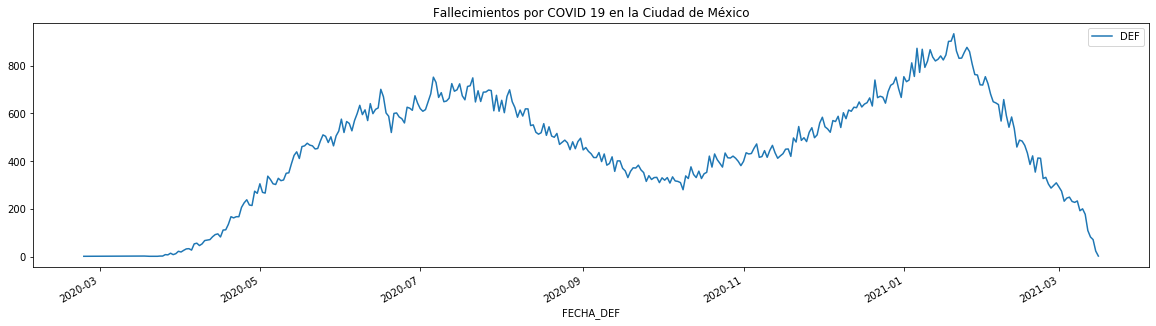

In [39]:
def_cdmx.plot(figsize=(20,5), title = "Fallecimientos por COVID 19 en la Ciudad de México")
plt.show()

In [34]:
def_cdmx=def_cdmx[1:]

In [35]:
def_cdmx

,DEF
FECHA_DEF,
2020-02-24,1
2020-03-18,2
2020-03-20,1
2020-03-22,1
2020-03-23,1
...,...
2021-03-12,109
2021-03-13,82
2021-03-14,71


In [40]:
first_date = pd.to_datetime("2020-04-04")
end_date = pd.to_datetime("2021-03-11")

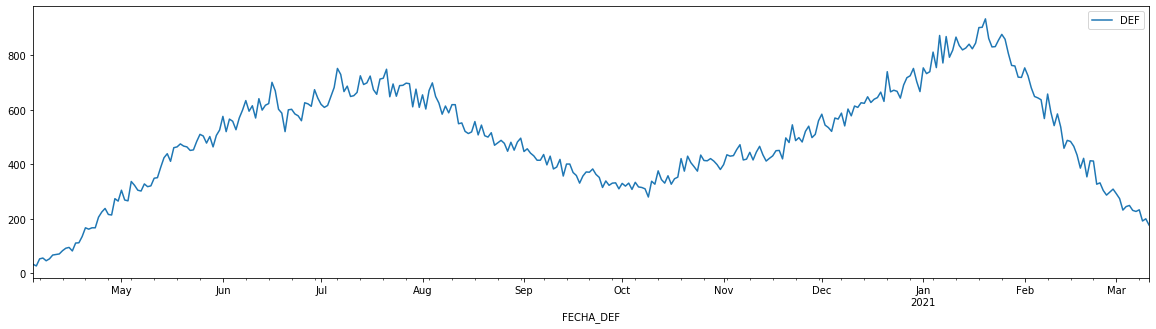

In [76]:
def_cdmx[first_date:end_date].plot(figsize=(20,5))
plt.show()

In [62]:
df_cdmx.head()

,SEXO,ENTIDAD_RES,MUNICIPIO_RES,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,DIABETES,...,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO_LAB,DEF
0,2,9,12,2020-10-16,2020-10-16,1999-01-31,97,2,41,2,...,2,2,2,2,2,2,2,2,97,0
3,1,9,10,2020-10-15,2020-10-15,1999-01-31,97,2,40,2,...,2,2,2,2,2,2,2,2,2,0
4,2,9,2,2020-04-16,2020-04-10,1999-01-31,97,2,34,2,...,1,2,2,2,2,2,2,2,97,0
6,1,9,6,2020-10-15,2020-10-14,1999-01-31,97,2,60,2,...,2,2,2,2,2,1,2,2,2,0
7,1,9,7,2021-01-14,2021-01-10,1999-01-31,97,2,20,2,...,2,2,2,2,2,2,2,2,97,0


In [70]:
confirmados = df_cdmx.groupby(["FECHA_INGRESO"])["RESULTADO_LAB"].agg("sum").reset_index()
confirmados.set_index("FECHA_INGRESO", inplace=True)

In [71]:
confirmados.head()

,RESULTADO_LAB
FECHA_INGRESO,
2020-02-24,1
2020-02-27,3
2020-03-04,1
2020-03-05,1
2020-03-07,1


In [73]:
confirmados = confirmados[first_date:end_date]

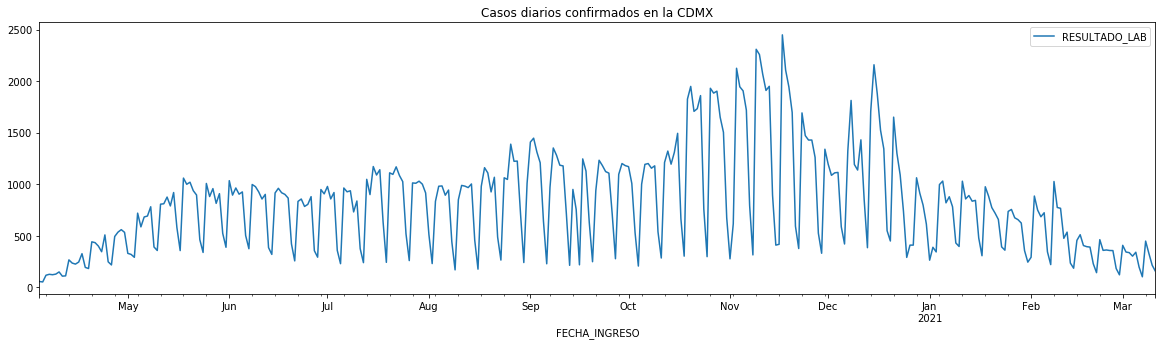

In [75]:
confirmados.plot(figsize=(20,5), title="Casos diarios confirmados en la CDMX")
plt.show()